In [2]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import pandas as pd
import numpy as np
import math as mt 
import matplotlib.pyplot as plt

# Part 1
Assisting equations and calculations

### Variance and mean 
of each feature for each class using: np.var and mean

In [3]:
iris2 = pd.read_csv('iris.csv')
print(iris2.head())
print('#########################')

## Sepal Length with 3 classes: Class_0 --> [:5], Class_1 --> [5:10], Class_2 --> [10:15]
print(np.var(iris2['sepalLength'][:5]))
print(np.var(iris2['sepalLength'][5:10]))
print(np.var(iris2['sepalLength'][10:15]))
print('#########################')

## Petal Length with 3 classes: Class_0 --> [:5], Class_1 --> [5:10], Class_2 --> [10:15]
print(np.var(iris2['petallength'][:5]))
print(np.var(iris2['petallength'][5:10]))
print(np.var(iris2['petallength'][10:15]))
print('#########################')

## Sepal Width with 3 classes: Class_0 --> [:5], Class_1 --> [5:10], Class_2 --> [10:15]
print(np.var(iris2['sepalwidth'][:5]))
print(np.var(iris2['sepalwidth'][5:10]))
print(np.var(iris2['sepalwidth'][10:15]))
print('#########################')

## Petal Width with 3 classes: Class_0 --> [:5], Class_1 --> [5:10], Class_2 --> [10:15]
print(np.var(iris2['petalwidth'][:5]))
print(np.var(iris2['petalwidth'][5:10]))
print(np.var(iris2['petalwidth'][10:15]))



   sepalLength  sepalwidth  petallength  petalwidth  Species
0          4.6         3.4          1.4         0.3        0
1          4.9         3.0          1.4         0.2        0
2          5.4         3.4          1.7         0.2        0
3          5.7         4.4          1.5         0.4        0
4          4.8         3.4          1.6         0.2        0
#########################
0.16560000000000016
0.09439999999999996
0.46960000000000013
#########################
0.01360000000000001
0.04559999999999995
0.15360000000000004
#########################
0.21760000000000015
0.010399999999999994
0.08240000000000003
#########################
0.0064
0.018400000000000014
0.05759999999999997


## Likelihood Calculation

In [4]:
# var --> the variance you want
# mean --> mean you want to insert
# x --> the feature value

var = 0.0576
mean = 2.02
x = 2.1

num = (1/(mt.sqrt(2*3.14*var)))
num2 = -pow((x-mean),2)
den2 = 2*var
likelihood = num* mt.exp(num2/den2)  
print(likelihood)

1.572828844525931


μ Class_0 = 5.08, 3.52, 1.52, 0.26  ---->   σ Class_0 = 0.17, 0.218, 0.0136, 0.0064\
μ Class_1 = 6.24, 3.16, 4.52, 1.56  ---->   σ Class_1 = 0.09, 0.045, 0.010, 0.00184\
μ Class_2 = 6.08, 2.86, 5.18, 2.02  ---->   σ Class_2 = 0.47, 0.082, 0.154, 0.0576

# Part2

## Loading IRIS Dataset

In [5]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["Species"])
# print(X.head(10))
# print(y.head(10))

## Dropping Petal features

In [6]:
X = X.drop(["petal length (cm)","petal width (cm)" ],axis=1)

## Steps to calculate likelihood

In [7]:
sepal_length_setosa = X['sepal length (cm)'][:50]
sepal_length_Versicolor = X['sepal length (cm)'][50:100]
sepal_length_Virginica = X['sepal length (cm)'][100:]

In [8]:
# Compute sample mean and stdev, for use as model parameter value guesses
mu_setosa= np.mean(sepal_length_setosa)
sigma_setosa = np.std(sepal_length_setosa)
# Sorting to make the plot appear fancier
sepal_length_setosa = sepal_length_setosa.sort_values(ascending=True)

mu_Versicolor= np.mean(sepal_length_Versicolor)
sigma_Versicolor = np.std(sepal_length_Versicolor)
sepal_length_Versicolor = sepal_length_Versicolor.sort_values(ascending=True)

mu_Virginica= np.mean(sepal_length_Virginica)
sigma_Virginica = np.std(sepal_length_Virginica)
sepal_length_Virginica= sepal_length_Virginica.sort_values(ascending=True)

In [9]:
# Functions to calculate the likelihood for each class based on the mean and standard deviation given
## The other approach: benefit from the class and feature from the mean and std of them however we input the numbers on our own
def like_setosa(xaxis, mu_setosa, sigma_setosa):
    li_setosa  = []
    for x in xaxis :
            num = (1/(mt.sqrt(2*3.14*pow(sigma_setosa,2))))
            num2 = -pow((x-mu_setosa ),2)
            den2 = 2*pow(sigma_setosa ,2)
            point = num* mt.exp(num2/den2)  
            li_setosa.append(point)
    return li_setosa

def like_Versi(xaxis, mu_Versicolor, sigma_Versicolor):
    li_Versicolor = []
    for x in xaxis:
            num = (1/(mt.sqrt(2*3.14*pow(sigma_Versicolor,2))))
            num2 = -pow((x-mu_Versicolor),2)
            den2 = 2*pow(sigma_Versicolor,2)
            point = num* mt.exp(num2/den2)  
            li_Versicolor.append(point)
    return li_Versicolor

def like_Virgi(xaxis, mu_Virginica, sigma_Virginica):
    li_Virginica = []
    for x in xaxis:
            num = (1/(mt.sqrt(2*3.14*pow(sigma_Virginica,2))))
            num2 = -pow((x-mu_Virginica),2)
            den2 = 2*pow(sigma_Virginica,2)
            point = num* mt.exp(num2/den2)  
            li_Virginica.append(point)
    return li_Virginica


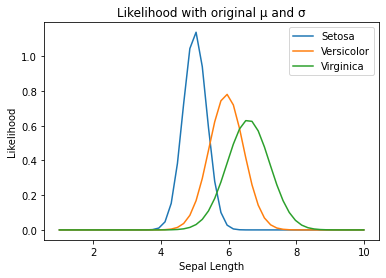

In [10]:
## Original Features
xaxis = np.linspace(1, 10, num=50)
plt.plot(xaxis, like_setosa(xaxis, mu_setosa, sigma_setosa)) 
plt.plot(xaxis, like_Versi(xaxis, mu_Versicolor, sigma_Versicolor)) 
plt.plot(xaxis, like_Virgi(xaxis, mu_Virginica, sigma_Virginica)) 
plt.xlabel('Sepal Length')
plt.ylabel('Likelihood')
plt.title('Likelihood with original μ and σ')
plt.legend( ['Setosa', 'Versicolor', 'Virginica'])
plt.show()

## Apply Naive Bayes

In [11]:
model = GaussianNB()
model.fit(X, y)
y_pred = model.predict(X)
# print(y_pred)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Plot posterior probability

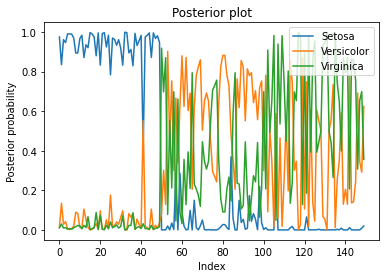

In [12]:
# The definition of posterior probability is what predict proba does which is calculating the probability of given input to belong to different classes
y_pred_proba = model.predict_proba(X)
# print(y_pred_proba)
plt.plot(y_pred_proba)
plt.xlabel('Index')
plt.ylabel('Posterior probability')
plt.title('Posterior plot')
plt.legend( ['Setosa', 'Versicolor', 'Virginica'], loc=1)
plt.show()

## Accuracy

In [13]:
print("Gaussian Naive Bayes model accuracy: {} %".format(metrics.accuracy_score(y, y_pred)*100))

Gaussian Naive Bayes model accuracy: 78.0 %


## Change parameters: μ = 5.5

In [14]:
model2 = GaussianNB()
model2.fit(X, y)

model2.theta_[:,0] = [5.5, 5.5, 5.5]
print(model2.theta_)

[[5.5   3.428]
 [5.5   2.77 ]
 [5.5   2.974]]


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Repeat previous steps

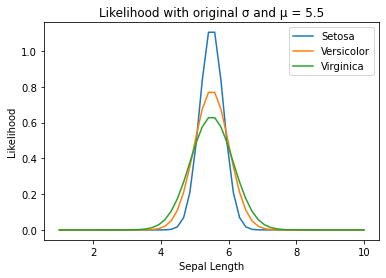

In [15]:
## μ = 5.5
plt.plot(xaxis,like_setosa(xaxis,5.5, sigma_setosa)) 
plt.plot(xaxis,like_Versi(xaxis,5.5, sigma_Versicolor)) 
plt.plot(xaxis,like_Virgi(xaxis,5.5, sigma_Virginica)) 
plt.xlabel('Sepal Length')
plt.ylabel('Likelihood')
plt.title('Likelihood with original σ and μ = 5.5')
plt.legend( ['Setosa', 'Versicolor', 'Virginica'])
plt.show()

In [16]:
y_pred2 = model2.predict(X)

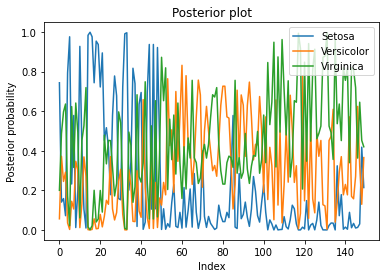

In [17]:
y_pred2_proba = model2.predict_proba(X)
plt.plot(y_pred2_proba)
plt.xlabel('Index')
plt.ylabel('Posterior probability')
plt.title('Posterior plot')
plt.legend(['Setosa', 'Versicolor', 'Virginica'], loc=1)
plt.show()

In [18]:
print("Gaussian Naive Bayes model accuracy: {} %".format(metrics.accuracy_score(y, y_pred2)*100))

Gaussian Naive Bayes model accuracy: 62.66666666666667 %


## Change parameters: σ = 0.26

In [22]:
model3 = GaussianNB()
model3.fit(X, y)

model3.sigma_[:,0]= [0.26, 0.26, 0.26]
print(model.sigma_)

[[0.121764 0.140816]
 [0.261104 0.0965  ]
 [0.396256 0.101924]]


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Repeat previous steps

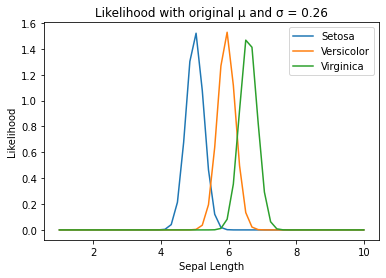

In [22]:
# σ = 0.26
plt.plot(xaxis,like_setosa(xaxis,mu_setosa, sigma_setosa= 0.26)) 
plt.plot(xaxis,like_Versi(xaxis,mu_Versicolor, sigma_Versicolor=0.26)) 
plt.plot(xaxis,like_Virgi(xaxis,mu_Virginica, sigma_Virginica=0.26)) 
plt.xlabel('Sepal Length')
plt.ylabel('Likelihood')
plt.title('Likelihood with original μ and σ = 0.26')
plt.legend( ['Setosa', 'Versicolor', 'Virginica'])
plt.show()

In [23]:
y_pred3 = model3.predict(X)

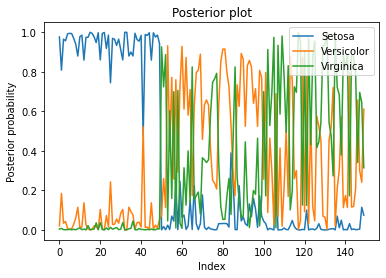

In [24]:
y_pred3_proba = model3.predict_proba(X)
plt.plot(y_pred3_proba)
plt.xlabel('Index')
plt.ylabel('Posterior probability')
plt.title('Posterior plot')
plt.legend(['Setosa', 'Versicolor', 'Virginica'], loc=1)
plt.show()

In [25]:
print("Gaussian Naive Bayes model accuracy: {} %".format(metrics.accuracy_score(y, y_pred3)*100))

Gaussian Naive Bayes model accuracy: 80.0 %
